In [1]:
from glob import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [3]:
PATH = "/Users/jahyeon_gu/Downloads/archive"

file_list = glob(f"{PATH}/*.csv")
file_list

['/Users/jahyeon_gu/Downloads/archive/olist_sellers_dataset.csv',
 '/Users/jahyeon_gu/Downloads/archive/product_category_name_translation.csv',
 '/Users/jahyeon_gu/Downloads/archive/olist_orders_dataset.csv',
 '/Users/jahyeon_gu/Downloads/archive/olist_order_items_dataset.csv',
 '/Users/jahyeon_gu/Downloads/archive/olist_customers_dataset.csv',
 '/Users/jahyeon_gu/Downloads/archive/olist_geolocation_dataset.csv',
 '/Users/jahyeon_gu/Downloads/archive/olist_order_payments_dataset.csv',
 '/Users/jahyeon_gu/Downloads/archive/olist_order_reviews_dataset.csv',
 '/Users/jahyeon_gu/Downloads/archive/olist_products_dataset.csv']

In [394]:
df = pd.read_csv('/Users/jahyeon_gu/Downloads/all.csv')
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'customer_unique_id',
       'customer_zip_code_prefix_x', 'customer_city', 'customer_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_zip_code_prefix_y', 'seller_city', 'seller_state'],
      dtype='object')

In [395]:
df = df[['order_id', 
'customer_id', 
'order_status', 
'order_purchase_timestamp',
'order_approved_at',
'order_delivered_carrier_date',
'order_delivered_customer_date',
'order_estimated_delivery_date',
'order_item_id',
'product_id', 
'seller_id', 
'shipping_limit_date',
'price', 
'freight_value', 
'payment_sequential', 
'payment_type',
'payment_installments', 
'payment_value', 
'review_id', 
'review_score',
'review_comment_title', 
'review_comment_message',
'review_creation_date', 
'review_answer_timestamp', 
'customer_unique_id',
'customer_zip_code_prefix_x', 
'customer_city', 
'customer_state',
'product_category_name',
'customer_zip_code_prefix_y', 
'seller_city', 
'seller_state']]

In [396]:
df.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix_x,customer_city,customer_state,product_category_name,customer_zip_code_prefix_y,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,9350.0,maua,SP


In [397]:
b = pd.read_csv(f"{PATH}/product_category_name_translation.csv")
b.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [398]:
df = df.merge(b)
print(df.shape)
df.head()

(116576, 33)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix_x,customer_city,customer_state,product_category_name,customer_zip_code_prefix_y,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,9350.0,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,9350.0,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,9350.0,maua,SP,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,2017-08-20 15:16:36,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,utilidades_domesticas,9350.0,maua,SP,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,2017-08-08 23:26:23,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,utilidades_domesticas,9350.0,maua,SP,housewares


In [399]:
# 주문 취소건은 매출 합계에 포함되지 않도록 제거
condition = df["order_status"] != "canceled"

df = df.loc[condition, :]
df["order_status"].unique()

array(['delivered', 'shipped', 'invoiced', 'processing', 'approved',
       'unavailable'], dtype=object)

In [400]:
# 연-월을 추출하기 위해 datetime으로 타입 변경
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116023 entries, 0 to 116575
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       116023 non-null  object        
 1   customer_id                    116023 non-null  object        
 2   order_status                   116023 non-null  object        
 3   order_purchase_timestamp       116023 non-null  datetime64[ns]
 4   order_approved_at              116009 non-null  object        
 5   order_delivered_carrier_date   115285 non-null  object        
 6   order_delivered_customer_date  114054 non-null  object        
 7   order_estimated_delivery_date  116023 non-null  object        
 8   order_item_id                  116023 non-null  float64       
 9   product_id                     116023 non-null  object        
 10  seller_id                      116023 non-null  object        
 11  

In [401]:
df["year_month"] = df["order_purchase_timestamp"].dt.strftime('%Y-%m')
df[["order_purchase_timestamp", "year_month"]].sample(10)

,order_purchase_timestamp,year_month
40384,2017-07-14 17:51:55,2017-07
4994,2017-11-25 00:32:14,2017-11
88216,2017-09-19 15:31:55,2017-09
73991,2018-02-05 12:16:57,2018-02
56367,2018-06-06 08:41:33,2018-06
42837,2017-01-28 23:45:53,2017-01
57486,2018-07-02 14:00:47,2018-07
68583,2018-08-19 11:45:54,2018-08
97465,2018-03-24 12:25:44,2018-03
104361,2018-03-21 21:03:45,2018-03


In [402]:
df = df.sort_values("year_month")
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_unique_id,customer_zip_code_prefix_x,customer_city,customer_state,product_category_name,customer_zip_code_prefix_y,seller_city,seller_state,product_category_name_english,year_month
49553,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,3.0,5a6b04657a4c5ee34285d1e4619a96b4,...,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,beleza_saude,81810.0,curitiba,PR,health_beauty,2016-09
49552,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,2.0,5a6b04657a4c5ee34285d1e4619a96b4,...,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,beleza_saude,81810.0,curitiba,PR,health_beauty,2016-09
49551,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,1.0,5a6b04657a4c5ee34285d1e4619a96b4,...,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,beleza_saude,81810.0,curitiba,PR,health_beauty,2016-09
34138,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaN,2016-10-20 00:00:00,2.0,f293394c72c9b5fafd7023301fc21fc2,...,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,moveis_decoracao,37580.0,monte siao,MG,furniture_decor,2016-09
34108,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaN,2016-10-20 00:00:00,1.0,c1488892604e4ba5cff5b4eb4d595400,...,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,moveis_decoracao,37580.0,monte siao,MG,furniture_decor,2016-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63654,7e8dc21f44e46302a51e046680bc6598,818b02531726186e24f2e19a6de1b712,delivered,2018-08-16 08:21:25,2018-08-17 03:31:01,2018-08-24 18:49:00,2018-08-27 16:20:57,2018-08-29 00:00:00,1.0,69455f41626a745aea9ee9164cb9eafd,...,1fe5362a7ab826c7f5fb85a9568ce3c7,13170,sumare,SP,relogios_presentes,7180.0,guarulhos,SP,watches_gifts,2018-08
63652,92de9d50e681619c103a7634c2f8bdaf,0e9ed7dc549f24ff1b3aefd168591469,delivered,2018-08-13 17:28:36,2018-08-13 17:44:12,2018-08-15 13:42:00,2018-09-01 02:18:43,2018-08-22 00:00:00,1.0,69455f41626a745aea9ee9164cb9eafd,...,43c91b8a1bc8ee8ad0005a2690d4c39c,7134,guarulhos,SP,relogios_presentes,7180.0,guarulhos,SP,watches_gifts,2018-08
27231,b436eb981676e54c0bc9bcade0e079c4,9f0b591bc0110c16bb95fdcb47878544,delivered,2018-08-06 09:29:23,2018-08-06 09:50:21,2018-08-06 16:16:00,2018-08-09 18:08:29,2018-08-29 00:00:00,2.0,ad00a218e16f65efb3dfebe514994ca1,...,e015ce18751465bc79eeabbe3f0064d5,18113,votorantim,SP,brinquedos,35501.0,divinopolis,MG,toys,2018-08
76892,59566b390f9e3f2182830b3a0b1022d0,05b9a99bdd307548ae19300848825919,delivered,2018-08-15 16:55:27,2018-08-15 17:10:23,2018-08-16 16:01:00,2018-08-24 00:49:45,2018-09-11 00:00:00,1.0,afb0d399cb1dec68de437eec41c94fad,...,75109d97f264aa44d4b06f733058da59,29090,vitoria,ES,telefonia,4160.0,sao paulo,SP,telephony,2018-08


# 기간별 매출액 & 주문 건수

In [49]:
df["product_category_name_english"].nunique()

71

In [544]:
temp = df.groupby(["year_month"]).agg({"price":"sum"})
temp = temp.iloc[:-1]
temp

,price
year_month,
2016-09,207.86
2016-10,48010.36
2016-12,10.90
2017-01,127978.08
2017-02,250589.29
2017-03,384950.31
2017-04,376342.31
2017-05,534488.27
2017-06,447995.21


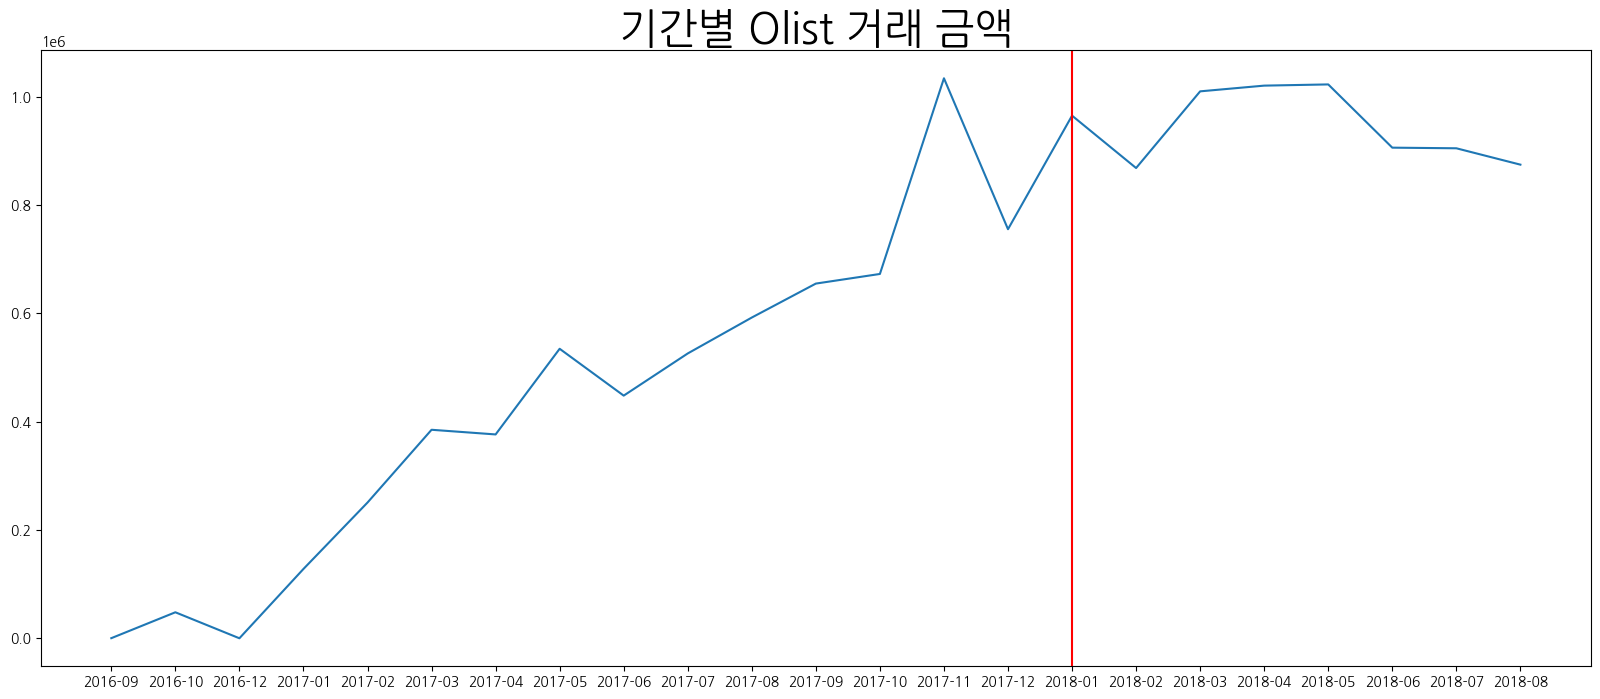

In [559]:
plt.figure(figsize=(20, 8))
plt.title("기간별 Olist 거래 금액", fontsize=30)
plt.plot(temp)
plt.axvline(x="2018-01", color='r')

In [563]:
temp = df.groupby(["year_month"]).agg({"order_id":"count"})
temp = temp.iloc[:-1]

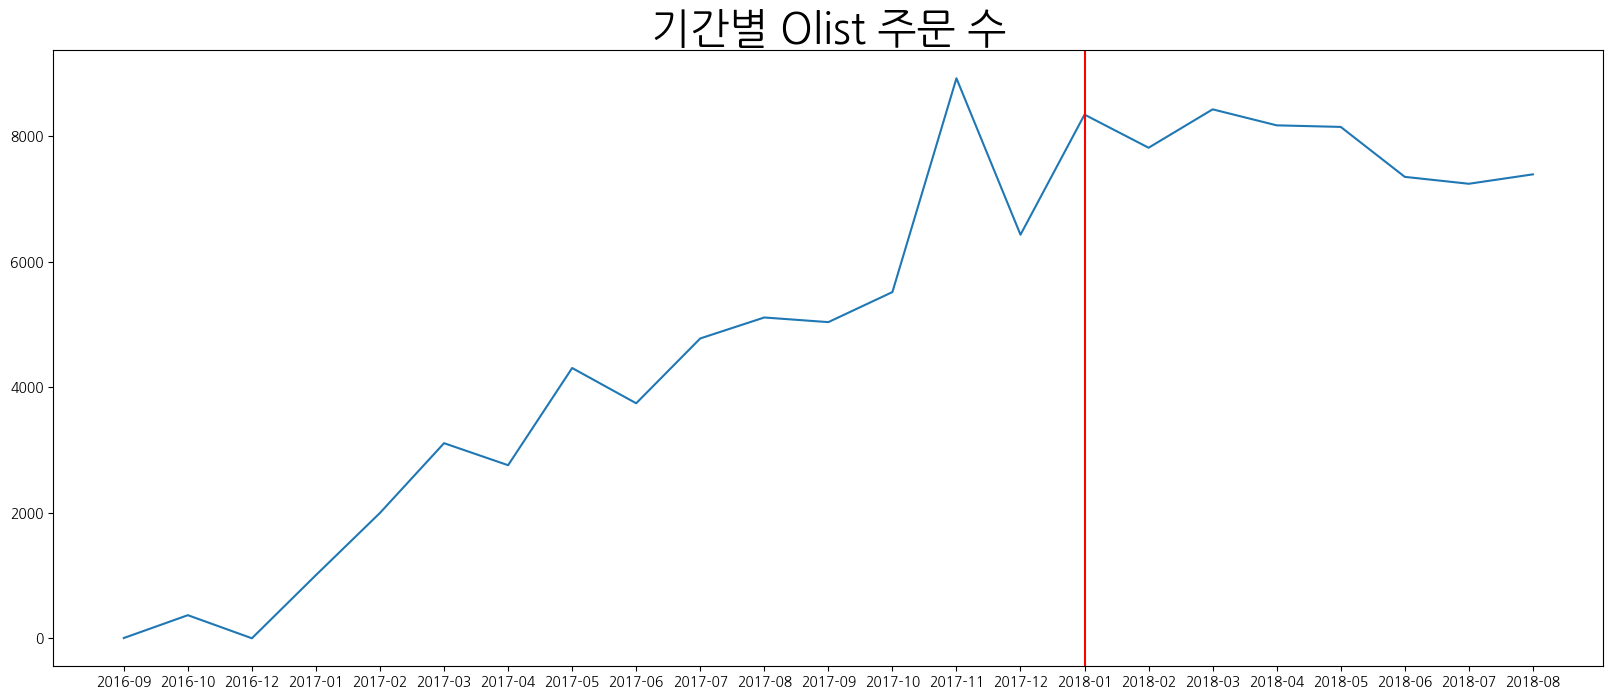

In [565]:
plt.figure(figsize=(20, 8))
plt.title("기간별 Olist 주문 수", fontsize=30)
plt.plot(temp)
plt.axvline(x="2018-01", color='r')

In [86]:
top10 = df.groupby("product_category_name_english").sum()["price"].sort_values(ascending=False).head(10).index
list(top10)

/var/folders/ql/gbsdt1191mbf_hk8mhnwwpd80000gn/T/ipykernel_54773/2788048253.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top10 = df.groupby("product_category_name_english").sum()["price"].sort_values(ascending=False).head(10).index


['health_beauty',
 'watches_gifts',
 'bed_bath_table',
 'sports_leisure',
 'computers_accessories',
 'furniture_decor',
 'housewares',
 'cool_stuff',
 'auto',
 'garden_tools']

In [87]:
df.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_unique_id,customer_zip_code_prefix_x,customer_city,customer_state,product_category_name,customer_zip_code_prefix_y,seller_city,seller_state,product_category_name_english,year_month
49553,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,3.0,5a6b04657a4c5ee34285d1e4619a96b4,...,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,beleza_saude,81810.0,curitiba,PR,health_beauty,2016-09


# 보완재

In [152]:
order_top30 = ['bed_bath_table', 'health_beauty', 'sports_leisure', 'furniture_decor',
       'computers_accessories', 'housewares', 'watches_gifts', 'telephony',
       'garden_tools', 'auto', 'toys', 'cool_stuff', 'perfumery', 'baby',
       'electronics', 'stationery', 'fashion_bags_accessories', 'pet_shop',
       'office_furniture', 'consoles_games', 'luggage_accessories',
       'construction_tools_construction', 'home_appliances',
       'musical_instruments', 'small_appliances', 'home_construction',
       'books_general_interest', 'furniture_living_room', 'food',
       'home_confort']

In [155]:
# 매출 top 30만 계산
df["order_top30"] = df["product_category_name_english"].map(lambda x: True if x in order_top30 else False)
df[["order_top30", "product_category_name_english"]].sample(5)

,order_top30,product_category_name_english
8219,True,baby
42268,True,health_beauty
101566,True,bed_bath_table
70776,True,computers_accessories
62036,True,watches_gifts


In [216]:
condition = df["order_top30"] == True
df_order_30 = df.loc[condition, :]
df_order_30

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_zip_code_prefix_x,customer_city,customer_state,product_category_name,customer_zip_code_prefix_y,seller_city,seller_state,product_category_name_english,year_month,order_top30
49553,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,3.0,5a6b04657a4c5ee34285d1e4619a96b4,...,14600,sao joaquim da barra,SP,beleza_saude,81810.0,curitiba,PR,health_beauty,2016-09,True
49552,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,2.0,5a6b04657a4c5ee34285d1e4619a96b4,...,14600,sao joaquim da barra,SP,beleza_saude,81810.0,curitiba,PR,health_beauty,2016-09,True
49551,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,1.0,5a6b04657a4c5ee34285d1e4619a96b4,...,14600,sao joaquim da barra,SP,beleza_saude,81810.0,curitiba,PR,health_beauty,2016-09,True
34138,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaN,2016-10-20 00:00:00,2.0,f293394c72c9b5fafd7023301fc21fc2,...,69309,boa vista,RR,moveis_decoracao,37580.0,monte siao,MG,furniture_decor,2016-09,True
34108,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaN,2016-10-20 00:00:00,1.0,c1488892604e4ba5cff5b4eb4d595400,...,69309,boa vista,RR,moveis_decoracao,37580.0,monte siao,MG,furniture_decor,2016-09,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106282,c863a49cb9cb9a145f7d39a575866b44,3611b8aa7d047bae70250b069092db25,delivered,2018-08-04 21:04:17,2018-08-04 21:15:14,2018-08-06 14:55:00,2018-08-13 21:06:26,2018-08-14 00:00:00,1.0,4c0f00c6b8f193c1cb9459e6b97e0320,...,12970,piracaia,SP,cama_mesa_banho,3001.0,sao paulo,SP,bed_bath_table,2018-08,True
63654,7e8dc21f44e46302a51e046680bc6598,818b02531726186e24f2e19a6de1b712,delivered,2018-08-16 08:21:25,2018-08-17 03:31:01,2018-08-24 18:49:00,2018-08-27 16:20:57,2018-08-29 00:00:00,1.0,69455f41626a745aea9ee9164cb9eafd,...,13170,sumare,SP,relogios_presentes,7180.0,guarulhos,SP,watches_gifts,2018-08,True
63652,92de9d50e681619c103a7634c2f8bdaf,0e9ed7dc549f24ff1b3aefd168591469,delivered,2018-08-13 17:28:36,2018-08-13 17:44:12,2018-08-15 13:42:00,2018-09-01 02:18:43,2018-08-22 00:00:00,1.0,69455f41626a745aea9ee9164cb9eafd,...,7134,guarulhos,SP,relogios_presentes,7180.0,guarulhos,SP,watches_gifts,2018-08,True
27231,b436eb981676e54c0bc9bcade0e079c4,9f0b591bc0110c16bb95fdcb47878544,delivered,2018-08-06 09:29:23,2018-08-06 09:50:21,2018-08-06 16:16:00,2018-08-09 18:08:29,2018-08-29 00:00:00,2.0,ad00a218e16f65efb3dfebe514994ca1,...,18113,votorantim,SP,brinquedos,35501.0,divinopolis,MG,toys,2018-08,True


In [217]:
df_order_30["order_top30"].unique()

array([ True])

In [218]:
df_order_30["product_category_name_english"].nunique()

30

In [219]:
# 보완재
temp_corr = pd.pivot_table(data=df_order_30, index="year_month", columns="product_category_name_english", values="order_id", aggfunc="count").corr()
temp_corr


product_category_name_english,auto,baby,bed_bath_table,books_general_interest,computers_accessories,consoles_games,construction_tools_construction,cool_stuff,electronics,fashion_bags_accessories,...,musical_instruments,office_furniture,perfumery,pet_shop,small_appliances,sports_leisure,stationery,telephony,toys,watches_gifts
product_category_name_english,,,,,,,,,,,,,,,,,,,,,
auto,1.000000,0.901487,0.814603,0.844662,0.784704,0.377712,0.873656,0.336742,0.808127,0.598015,...,0.860948,0.500753,0.748691,0.894468,0.629828,0.829190,0.691649,0.801399,0.394233,0.915018
baby,0.901487,1.000000,0.905980,0.829830,0.746169,0.445365,0.797592,0.462681,0.775802,0.691052,...,0.912299,0.621663,0.772630,0.878952,0.719041,0.868517,0.699856,0.773970,0.497423,0.955316
bed_bath_table,0.814603,0.905980,1.000000,0.811884,0.816238,0.635728,0.561853,0.695562,0.795727,0.839503,...,0.877532,0.710156,0.894546,0.744449,0.671855,0.932125,0.716257,0.888653,0.660966,0.853421
books_general_interest,0.844662,0.829830,0.811884,1.000000,0.671918,0.414417,0.651361,0.491601,0.792355,0.683705,...,0.862890,0.515391,0.729372,0.731356,0.712331,0.760954,0.697905,0.767674,0.479886,0.841541
computers_accessories,0.784704,0.746169,0.816238,0.671918,1.000000,0.354064,0.472913,0.551783,0.889121,0.610770,...,0.784153,0.718576,0.694215,0.581398,0.540632,0.895379,0.650903,0.866250,0.322103,0.671216
consoles_games,0.377712,0.445365,0.635728,0.414417,0.354064,1.000000,0.024674,0.678410,0.313603,0.808694,...,0.296604,0.283849,0.751622,0.256729,0.129321,0.600751,0.343366,0.574157,0.853341,0.483144
construction_tools_construction,0.873656,0.797592,0.561853,0.651361,0.472913,0.024674,1.000000,-0.211140,0.520705,0.228019,...,0.667555,0.146596,0.468099,0.925349,0.478118,0.479817,0.467011,0.483335,0.017418,0.820268
cool_stuff,0.336742,0.462681,0.695562,0.491601,0.551783,0.678410,-0.211140,1.000000,0.481853,0.814439,...,0.468279,0.613488,0.689367,0.202279,0.260413,0.729375,0.445847,0.687129,0.721191,0.373048
electronics,0.808127,0.775802,0.795727,0.792355,0.889121,0.313603,0.520705,0.481853,1.000000,0.588220,...,0.849083,0.653260,0.706825,0.553214,0.612847,0.847875,0.849778,0.848610,0.388351,0.740596


In [220]:
mask = np.triu(np.ones(temp_corr.shape))
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1

<AxesSubplot: xlabel='product_category_name_english', ylabel='product_category_name_english'>

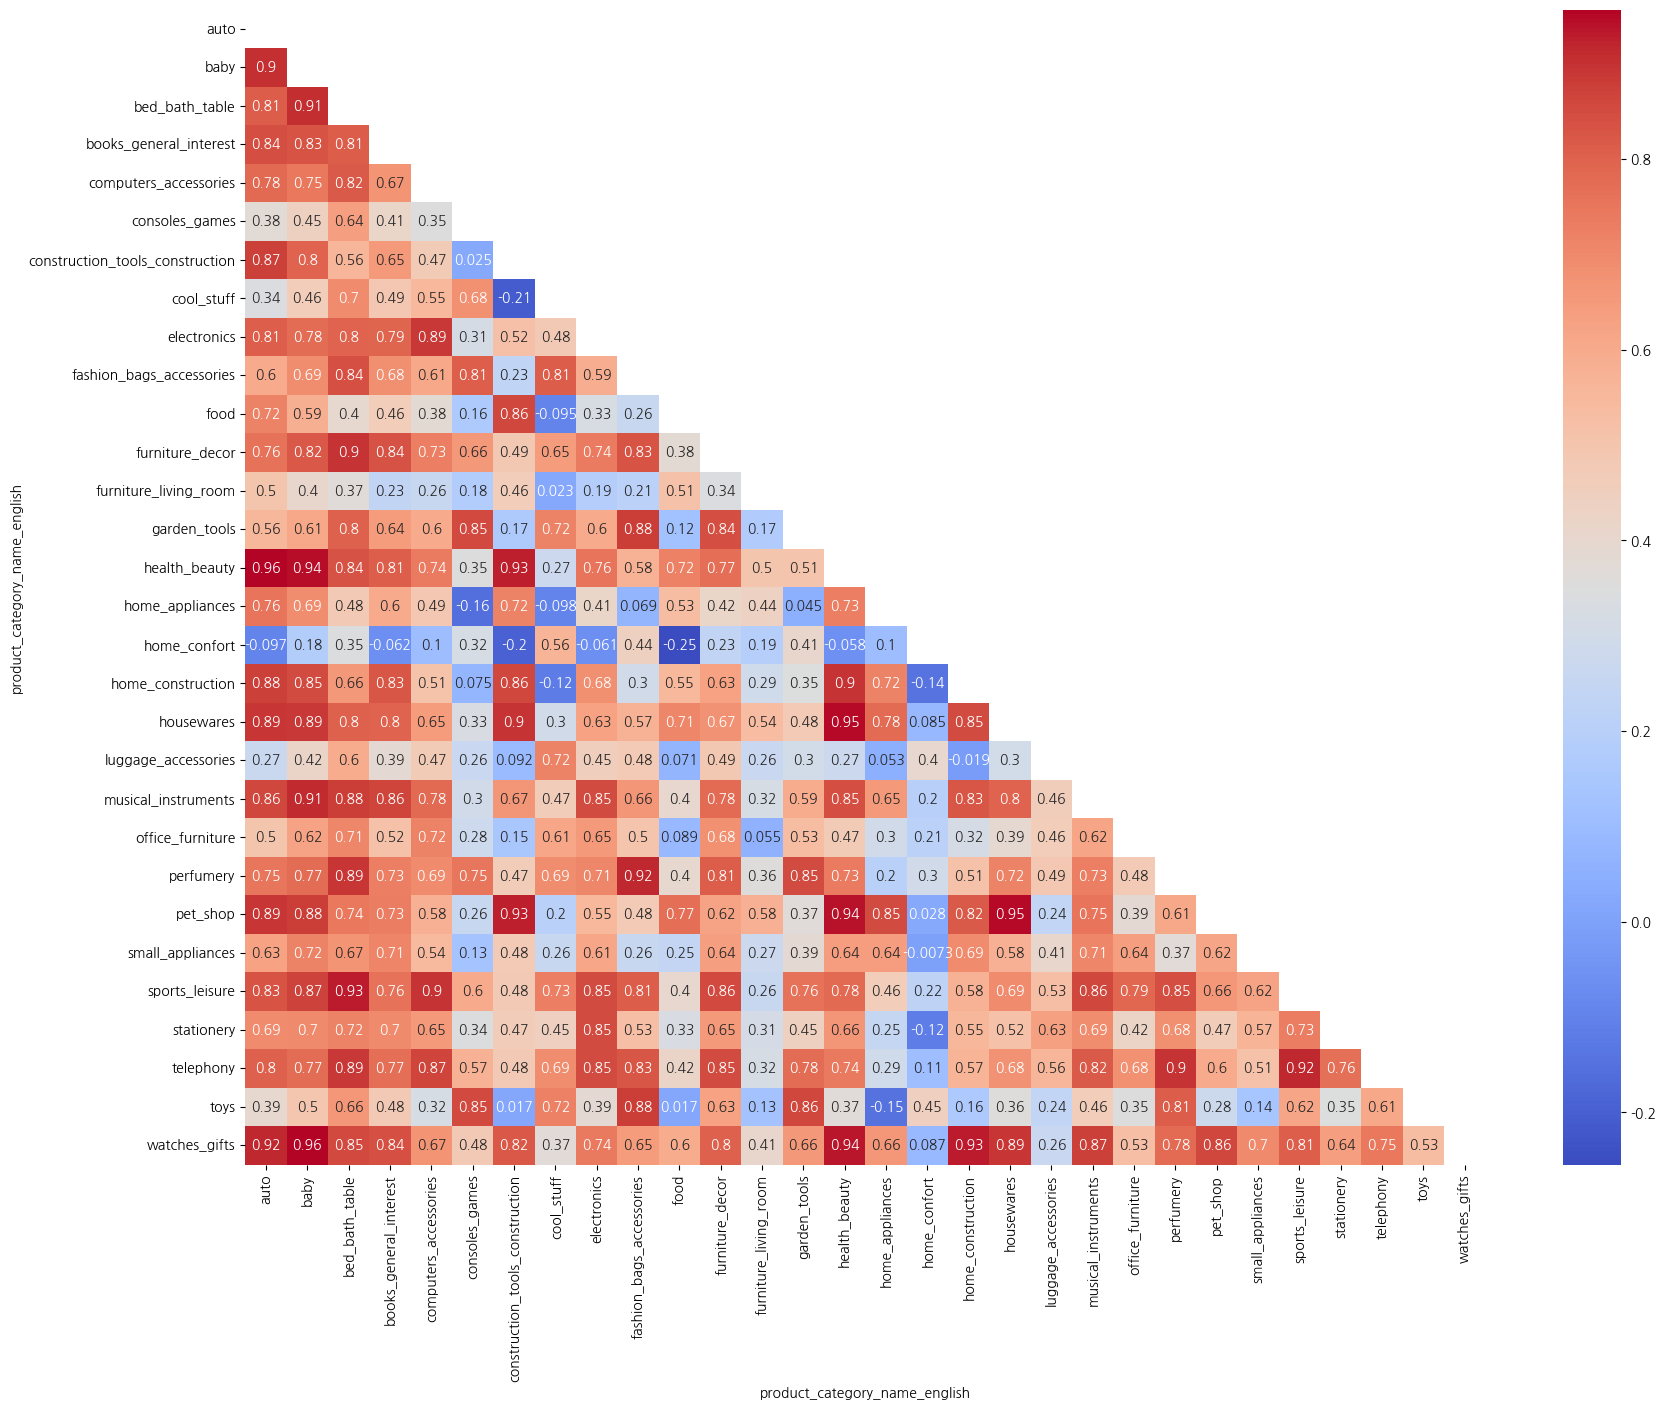

In [223]:
plt.figure(figsize=(20, 15))
sns.heatmap(temp_corr, cmap="coolwarm", mask=mask, annot=True)

In [224]:
df_order_30["product_category_name_english"].nunique()

30

In [225]:
# 가격은 합계, 셀러id 는 count
temp = df_order_30.groupby(["year_month", "product_category_name_english"]).agg({"price":"sum", "seller_id":"count"})
temp["ratio"] = round(temp["price"] / temp["seller_id"], 2)
temp = temp.iloc[:-1]
temp

price  seller_id   ratio
year_month product_category_name_english                             
2016-09    furniture_decor                   72.89          2   36.44
           health_beauty                    134.97          3   44.99
2016-10    auto                            1443.25         10  144.32
           baby                            1530.16         13  117.70
           bed_bath_table                   478.99          8   59.87
...                                            ...        ...     ...
2018-08    small_appliances                6291.96         25  251.68
           sports_leisure                 51487.59        479  107.49
           stationery                     16176.65        172   94.05
           telephony                      39389.82        289  136.30
           toys                           16923.75        165  102.57

[619 rows x 3 columns]

Text(0.5, 1.0, '월별 판매 기록이 있는 seller의 수')

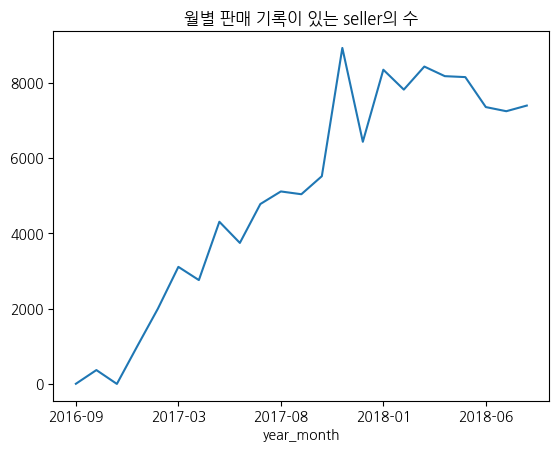

In [137]:
temp['seller_id'].plot().set_title("월별 판매 기록이 있는 seller의 수")

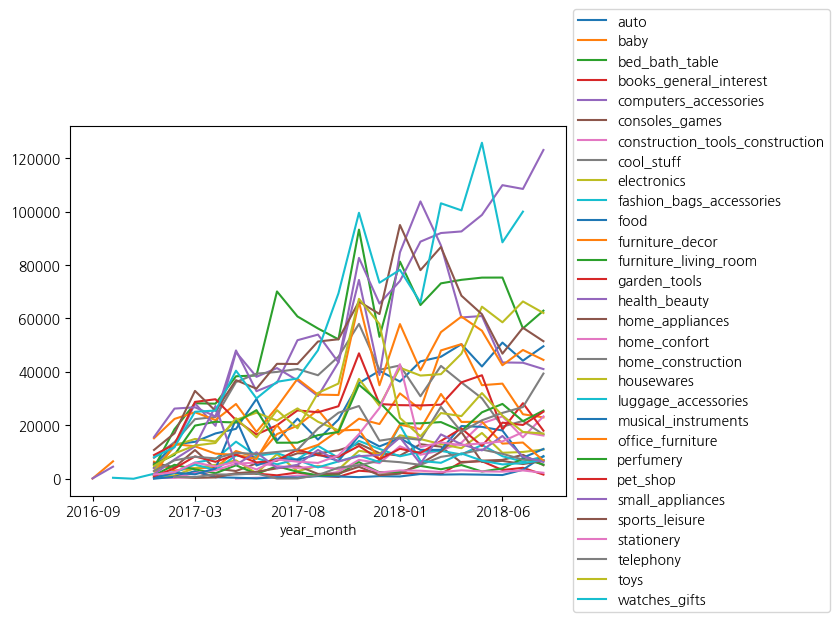

In [233]:
temp.unstack()["price"].plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [566]:
condition = df["product_category_name_english"].map(lambda x: True if x in order_top30[:10] else False)
temp = df.loc[condition, :]
temp

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_unique_id,customer_zip_code_prefix_x,customer_city,customer_state,product_category_name,customer_zip_code_prefix_y,seller_city,seller_state,product_category_name_english,year_month
49553,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,3.0,5a6b04657a4c5ee34285d1e4619a96b4,...,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,beleza_saude,81810.0,curitiba,PR,health_beauty,2016-09
49552,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,2.0,5a6b04657a4c5ee34285d1e4619a96b4,...,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,beleza_saude,81810.0,curitiba,PR,health_beauty,2016-09
49551,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,1.0,5a6b04657a4c5ee34285d1e4619a96b4,...,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,beleza_saude,81810.0,curitiba,PR,health_beauty,2016-09
34138,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaN,2016-10-20 00:00:00,2.0,f293394c72c9b5fafd7023301fc21fc2,...,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,moveis_decoracao,37580.0,monte siao,MG,furniture_decor,2016-09
34108,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaN,2016-10-20 00:00:00,1.0,c1488892604e4ba5cff5b4eb4d595400,...,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,moveis_decoracao,37580.0,monte siao,MG,furniture_decor,2016-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63657,49096a052563c7c07964cb46f6f4d572,a441c76bdc95aee0610d80ad242f00cc,delivered,2018-08-22 10:51:09,2018-08-22 11:04:36,2018-08-28 13:36:00,2018-08-30 22:16:30,2018-08-30 00:00:00,1.0,69455f41626a745aea9ee9164cb9eafd,...,9650fed8d3c841be1c0bc539b047b674,7160,guarulhos,SP,relogios_presentes,7180.0,guarulhos,SP,watches_gifts,2018-08
106282,c863a49cb9cb9a145f7d39a575866b44,3611b8aa7d047bae70250b069092db25,delivered,2018-08-04 21:04:17,2018-08-04 21:15:14,2018-08-06 14:55:00,2018-08-13 21:06:26,2018-08-14 00:00:00,1.0,4c0f00c6b8f193c1cb9459e6b97e0320,...,8f02022dccfa73911d7d45b28e9d9785,12970,piracaia,SP,cama_mesa_banho,3001.0,sao paulo,SP,bed_bath_table,2018-08
63654,7e8dc21f44e46302a51e046680bc6598,818b02531726186e24f2e19a6de1b712,delivered,2018-08-16 08:21:25,2018-08-17 03:31:01,2018-08-24 18:49:00,2018-08-27 16:20:57,2018-08-29 00:00:00,1.0,69455f41626a745aea9ee9164cb9eafd,...,1fe5362a7ab826c7f5fb85a9568ce3c7,13170,sumare,SP,relogios_presentes,7180.0,guarulhos,SP,watches_gifts,2018-08
63652,92de9d50e681619c103a7634c2f8bdaf,0e9ed7dc549f24ff1b3aefd168591469,delivered,2018-08-13 17:28:36,2018-08-13 17:44:12,2018-08-15 13:42:00,2018-09-01 02:18:43,2018-08-22 00:00:00,1.0,69455f41626a745aea9ee9164cb9eafd,...,43c91b8a1bc8ee8ad0005a2690d4c39c,7134,guarulhos,SP,relogios_presentes,7180.0,guarulhos,SP,watches_gifts,2018-08


In [454]:
temp["product_category_name_english"].nunique()

10

In [567]:
temp = df_top.groupby(["year_month", "product_category_name_english"]).agg({"price":"sum", "seller_id":"count"})
temp

price  seller_id
year_month product_category_name_english                      
2016-09    furniture_decor                    72.89          2
           health_beauty                     134.97          3
2016-10    auto                             1443.25         10
           bed_bath_table                    478.99          8
           computers_accessories            1573.22         24
...                                             ...        ...
2018-08    garden_tools                    17999.10        146
           health_beauty                  123080.37        871
           housewares                      62064.45        646
           sports_leisure                  51487.59        479
           watches_gifts                   76581.87        428

[212 rows x 2 columns]

In [461]:
temp["ratio"] = round(temp["price"] / temp["seller_id"], 2)
temp

price  seller_id   ratio
year_month product_category_name_english                              
2016-09    furniture_decor                    72.89          2   36.44
           health_beauty                     134.97          3   44.99
2016-10    auto                             1443.25         10  144.32
           bed_bath_table                    478.99          8   59.87
           computers_accessories            1573.22         24   65.55
...                                             ...        ...     ...
2018-08    health_beauty                  123080.37        871  141.31
           housewares                      62064.45        646   96.07
           sports_leisure                  51487.59        479  107.49
           telephony                       39389.82        289  136.30
           watches_gifts                   76581.87        428  178.93

[233 rows x 3 columns]

<AxesSubplot: xlabel='year_month'>

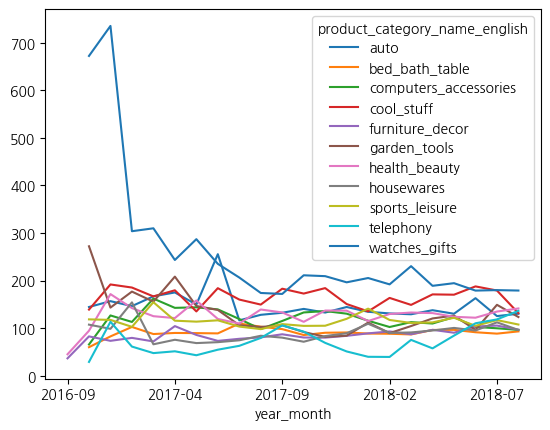

In [465]:
temp.unstack()["ratio"].plot()

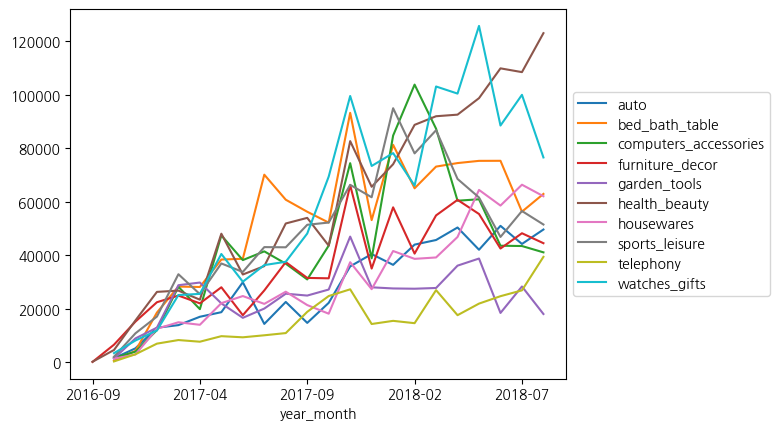

In [248]:
temp.unstack()["price"].plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## 매출, 주문건수가 18년부터 눕기 시작함 -> 성장 둔화
## 17년 동일하게 성장한 TOP10의 카테고리 확인
## 성장하면서 해당 카테고리 평균 가격과 셀러의 수에 어떤 변화가 있었나? + 제품 사이즈 변화도 확인

In [493]:
# 전체 seller의 수
df['seller_id'].nunique()

2993

In [494]:
# 품목별 총 매출액 합계
df.groupby(["product_category_name_english"]).agg({"price":"sum"}).sort_values("price", ascending=False)

,price
product_category_name_english,
health_beauty,1298786.47
watches_gifts,1247502.48
bed_bath_table,1106224.47
sports_leisure,1021259.93
computers_accessories,942421.39
...,...
flowers,1110.04
home_comfort_2,773.17
cds_dvds_musicals,730.00


In [495]:
# 품목별 총 매출액 상위 10등
top_selling = df.groupby(["product_category_name_english"]).agg({"price":"sum"}).sort_values("price", ascending=False).index
top_selling[:10]

Index(['health_beauty', 'watches_gifts', 'bed_bath_table', 'sports_leisure',
       'computers_accessories', 'furniture_decor', 'housewares', 'cool_stuff',
       'auto', 'garden_tools'],
      dtype='object', name='product_category_name_english')

In [496]:
# 품목별 셀러의 수
df.groupby(["product_category_name_english"]).agg({"seller_id":"count"}).sort_values("seller_id", ascending=False)

,seller_id
product_category_name_english,
bed_bath_table,11970
health_beauty,9992
sports_leisure,8952
furniture_decor,8794
computers_accessories,8104
...,...
arts_and_craftmanship,24
la_cuisine,16
cds_dvds_musicals,14


In [497]:
# 품목별 셀러의 수
top_seller = df.groupby(["product_category_name_english"]).agg({"seller_id":"count"}).sort_values("seller_id", ascending=False).index
top_seller[:10]

Index(['bed_bath_table', 'health_beauty', 'sports_leisure', 'furniture_decor',
       'computers_accessories', 'housewares', 'watches_gifts', 'telephony',
       'garden_tools', 'auto'],
      dtype='object', name='product_category_name_english')

In [498]:
# top10 중 9개의 품목이 동일 
print(set(top_selling[:10]) - set(top_seller[:10]))
print(set(top_seller[:10]) - set(top_selling[:10]))

{'cool_stuff'}
{'telephony'}


In [500]:
temp_l = list(top_selling[:10])
print(len(temp_l))
temp_l

10


['health_beauty',
 'watches_gifts',
 'bed_bath_table',
 'sports_leisure',
 'computers_accessories',
 'furniture_decor',
 'housewares',
 'cool_stuff',
 'auto',
 'garden_tools']

In [501]:
condition = df["product_category_name_english"].map(lambda x: True if x in temp_l else False)

df_top = df.loc[condition, :]
print(df_top["product_category_name_english"].nunique())
df_top

10


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_unique_id,customer_zip_code_prefix_x,customer_city,customer_state,product_category_name,customer_zip_code_prefix_y,seller_city,seller_state,product_category_name_english,year_month
49553,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,3.0,5a6b04657a4c5ee34285d1e4619a96b4,...,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,beleza_saude,81810.0,curitiba,PR,health_beauty,2016-09
49552,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,2.0,5a6b04657a4c5ee34285d1e4619a96b4,...,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,beleza_saude,81810.0,curitiba,PR,health_beauty,2016-09
49551,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,1.0,5a6b04657a4c5ee34285d1e4619a96b4,...,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,beleza_saude,81810.0,curitiba,PR,health_beauty,2016-09
34138,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaN,2016-10-20 00:00:00,2.0,f293394c72c9b5fafd7023301fc21fc2,...,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,moveis_decoracao,37580.0,monte siao,MG,furniture_decor,2016-09
34108,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaN,2016-10-20 00:00:00,1.0,c1488892604e4ba5cff5b4eb4d595400,...,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,moveis_decoracao,37580.0,monte siao,MG,furniture_decor,2016-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63659,4d59391202a2a67c2e2fea6f349a67f5,7030ef488b9f80599046408a5de28cca,delivered,2018-08-13 13:14:03,2018-08-13 13:25:14,2018-08-15 13:42:00,2018-08-17 13:37:42,2018-08-22 00:00:00,1.0,69455f41626a745aea9ee9164cb9eafd,...,81040442e9807c1aaf2e621ef05c1c7e,7193,guarulhos,SP,relogios_presentes,7180.0,guarulhos,SP,watches_gifts,2018-08
63657,49096a052563c7c07964cb46f6f4d572,a441c76bdc95aee0610d80ad242f00cc,delivered,2018-08-22 10:51:09,2018-08-22 11:04:36,2018-08-28 13:36:00,2018-08-30 22:16:30,2018-08-30 00:00:00,1.0,69455f41626a745aea9ee9164cb9eafd,...,9650fed8d3c841be1c0bc539b047b674,7160,guarulhos,SP,relogios_presentes,7180.0,guarulhos,SP,watches_gifts,2018-08
106282,c863a49cb9cb9a145f7d39a575866b44,3611b8aa7d047bae70250b069092db25,delivered,2018-08-04 21:04:17,2018-08-04 21:15:14,2018-08-06 14:55:00,2018-08-13 21:06:26,2018-08-14 00:00:00,1.0,4c0f00c6b8f193c1cb9459e6b97e0320,...,8f02022dccfa73911d7d45b28e9d9785,12970,piracaia,SP,cama_mesa_banho,3001.0,sao paulo,SP,bed_bath_table,2018-08
63654,7e8dc21f44e46302a51e046680bc6598,818b02531726186e24f2e19a6de1b712,delivered,2018-08-16 08:21:25,2018-08-17 03:31:01,2018-08-24 18:49:00,2018-08-27 16:20:57,2018-08-29 00:00:00,1.0,69455f41626a745aea9ee9164cb9eafd,...,1fe5362a7ab826c7f5fb85a9568ce3c7,13170,sumare,SP,relogios_presentes,7180.0,guarulhos,SP,watches_gifts,2018-08


## 매출액 top10

In [511]:
temp = df_top.groupby("product_category_name_english").agg({"price":"sum"})
temp = temp.sort_values("price", ascending=False)
temp

,price
product_category_name_english,
health_beauty,1298786.47
watches_gifts,1247502.48
bed_bath_table,1106224.47
sports_leisure,1021259.93
computers_accessories,942421.39
furniture_decor,769637.12
housewares,662175.18
cool_stuff,647532.67
auto,612009.82


Text(0.5, 1.0, '매출액 top10 품목')

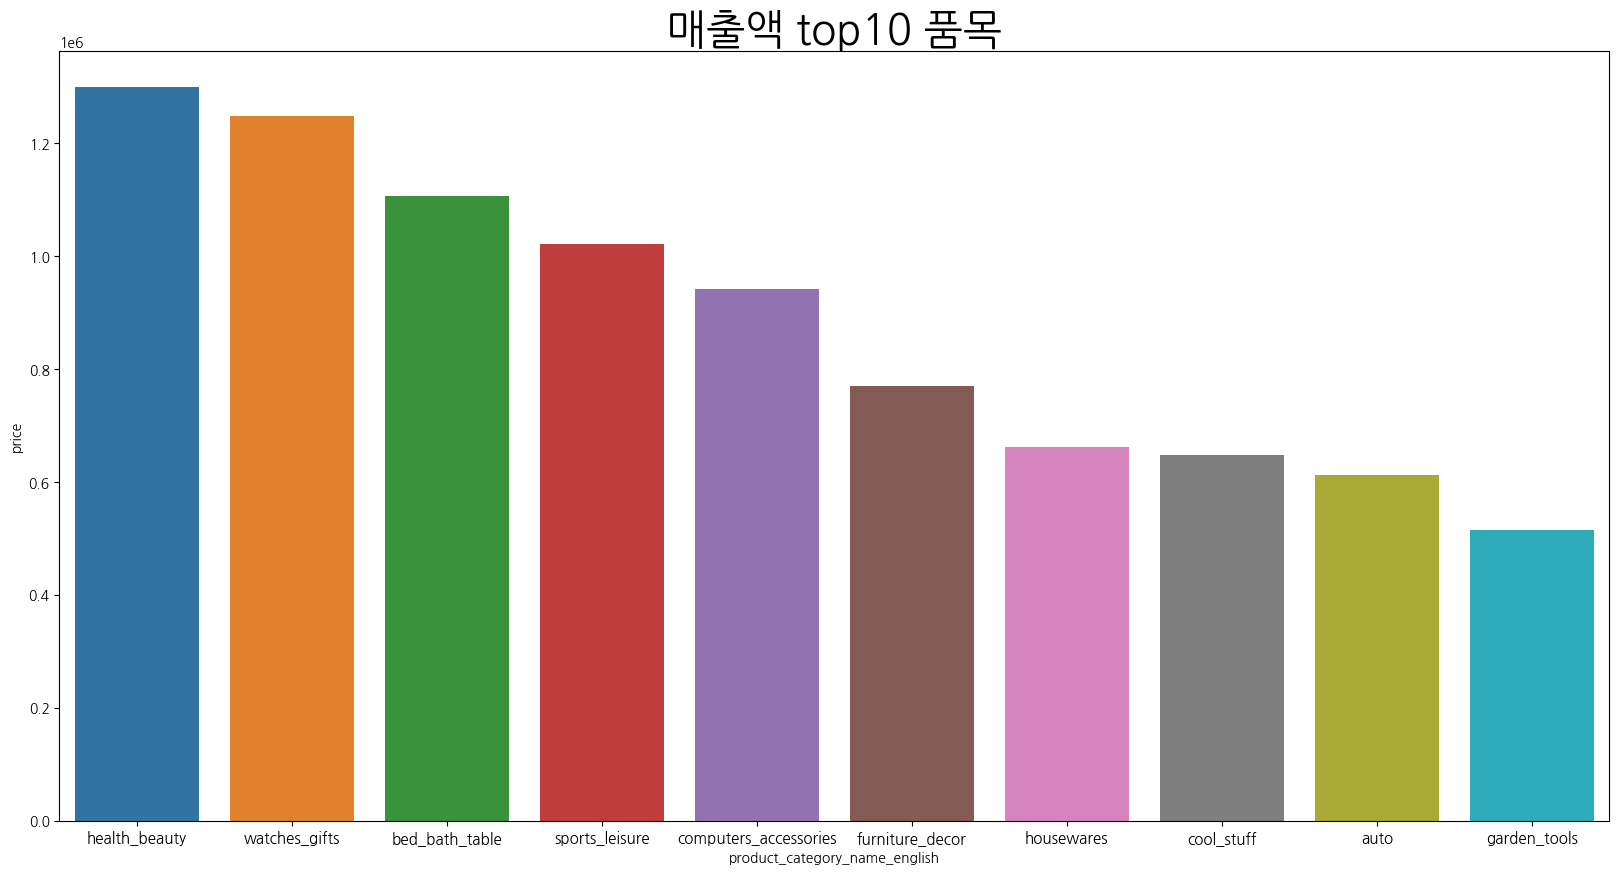

In [532]:
plt.figure(figsize=(20, 10))
plt.xticks(fontsize=11)
sns.barplot(data=temp, x=temp.index, y="price").set_title("매출액 top10 품목", fontsize=30)

## 매출액 top10 기간별 매출 추이

In [502]:
# 상위 10등의 품목들의 매출 추이
temp = df_top.groupby(["year_month", "product_category_name_english"]).agg({"price":"sum", "seller_id":"count"})
temp

price  seller_id
year_month product_category_name_english                      
2016-09    furniture_decor                    72.89          2
           health_beauty                     134.97          3
2016-10    auto                             1443.25         10
           bed_bath_table                    478.99          8
           computers_accessories            1573.22         24
...                                             ...        ...
2018-08    garden_tools                    17999.10        146
           health_beauty                  123080.37        871
           housewares                      62064.45        646
           sports_leisure                  51487.59        479
           watches_gifts                   76581.87        428

[212 rows x 2 columns]

In [433]:
temp.unstack()[temp.unstack().columns[i]].index

Index(['2016-09', '2016-10', '2017-01', '2017-02', '2017-03', '2017-04',
       '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10',
       '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04',
       '2018-05', '2018-06', '2018-07', '2018-08'],
      dtype='object', name='year_month')

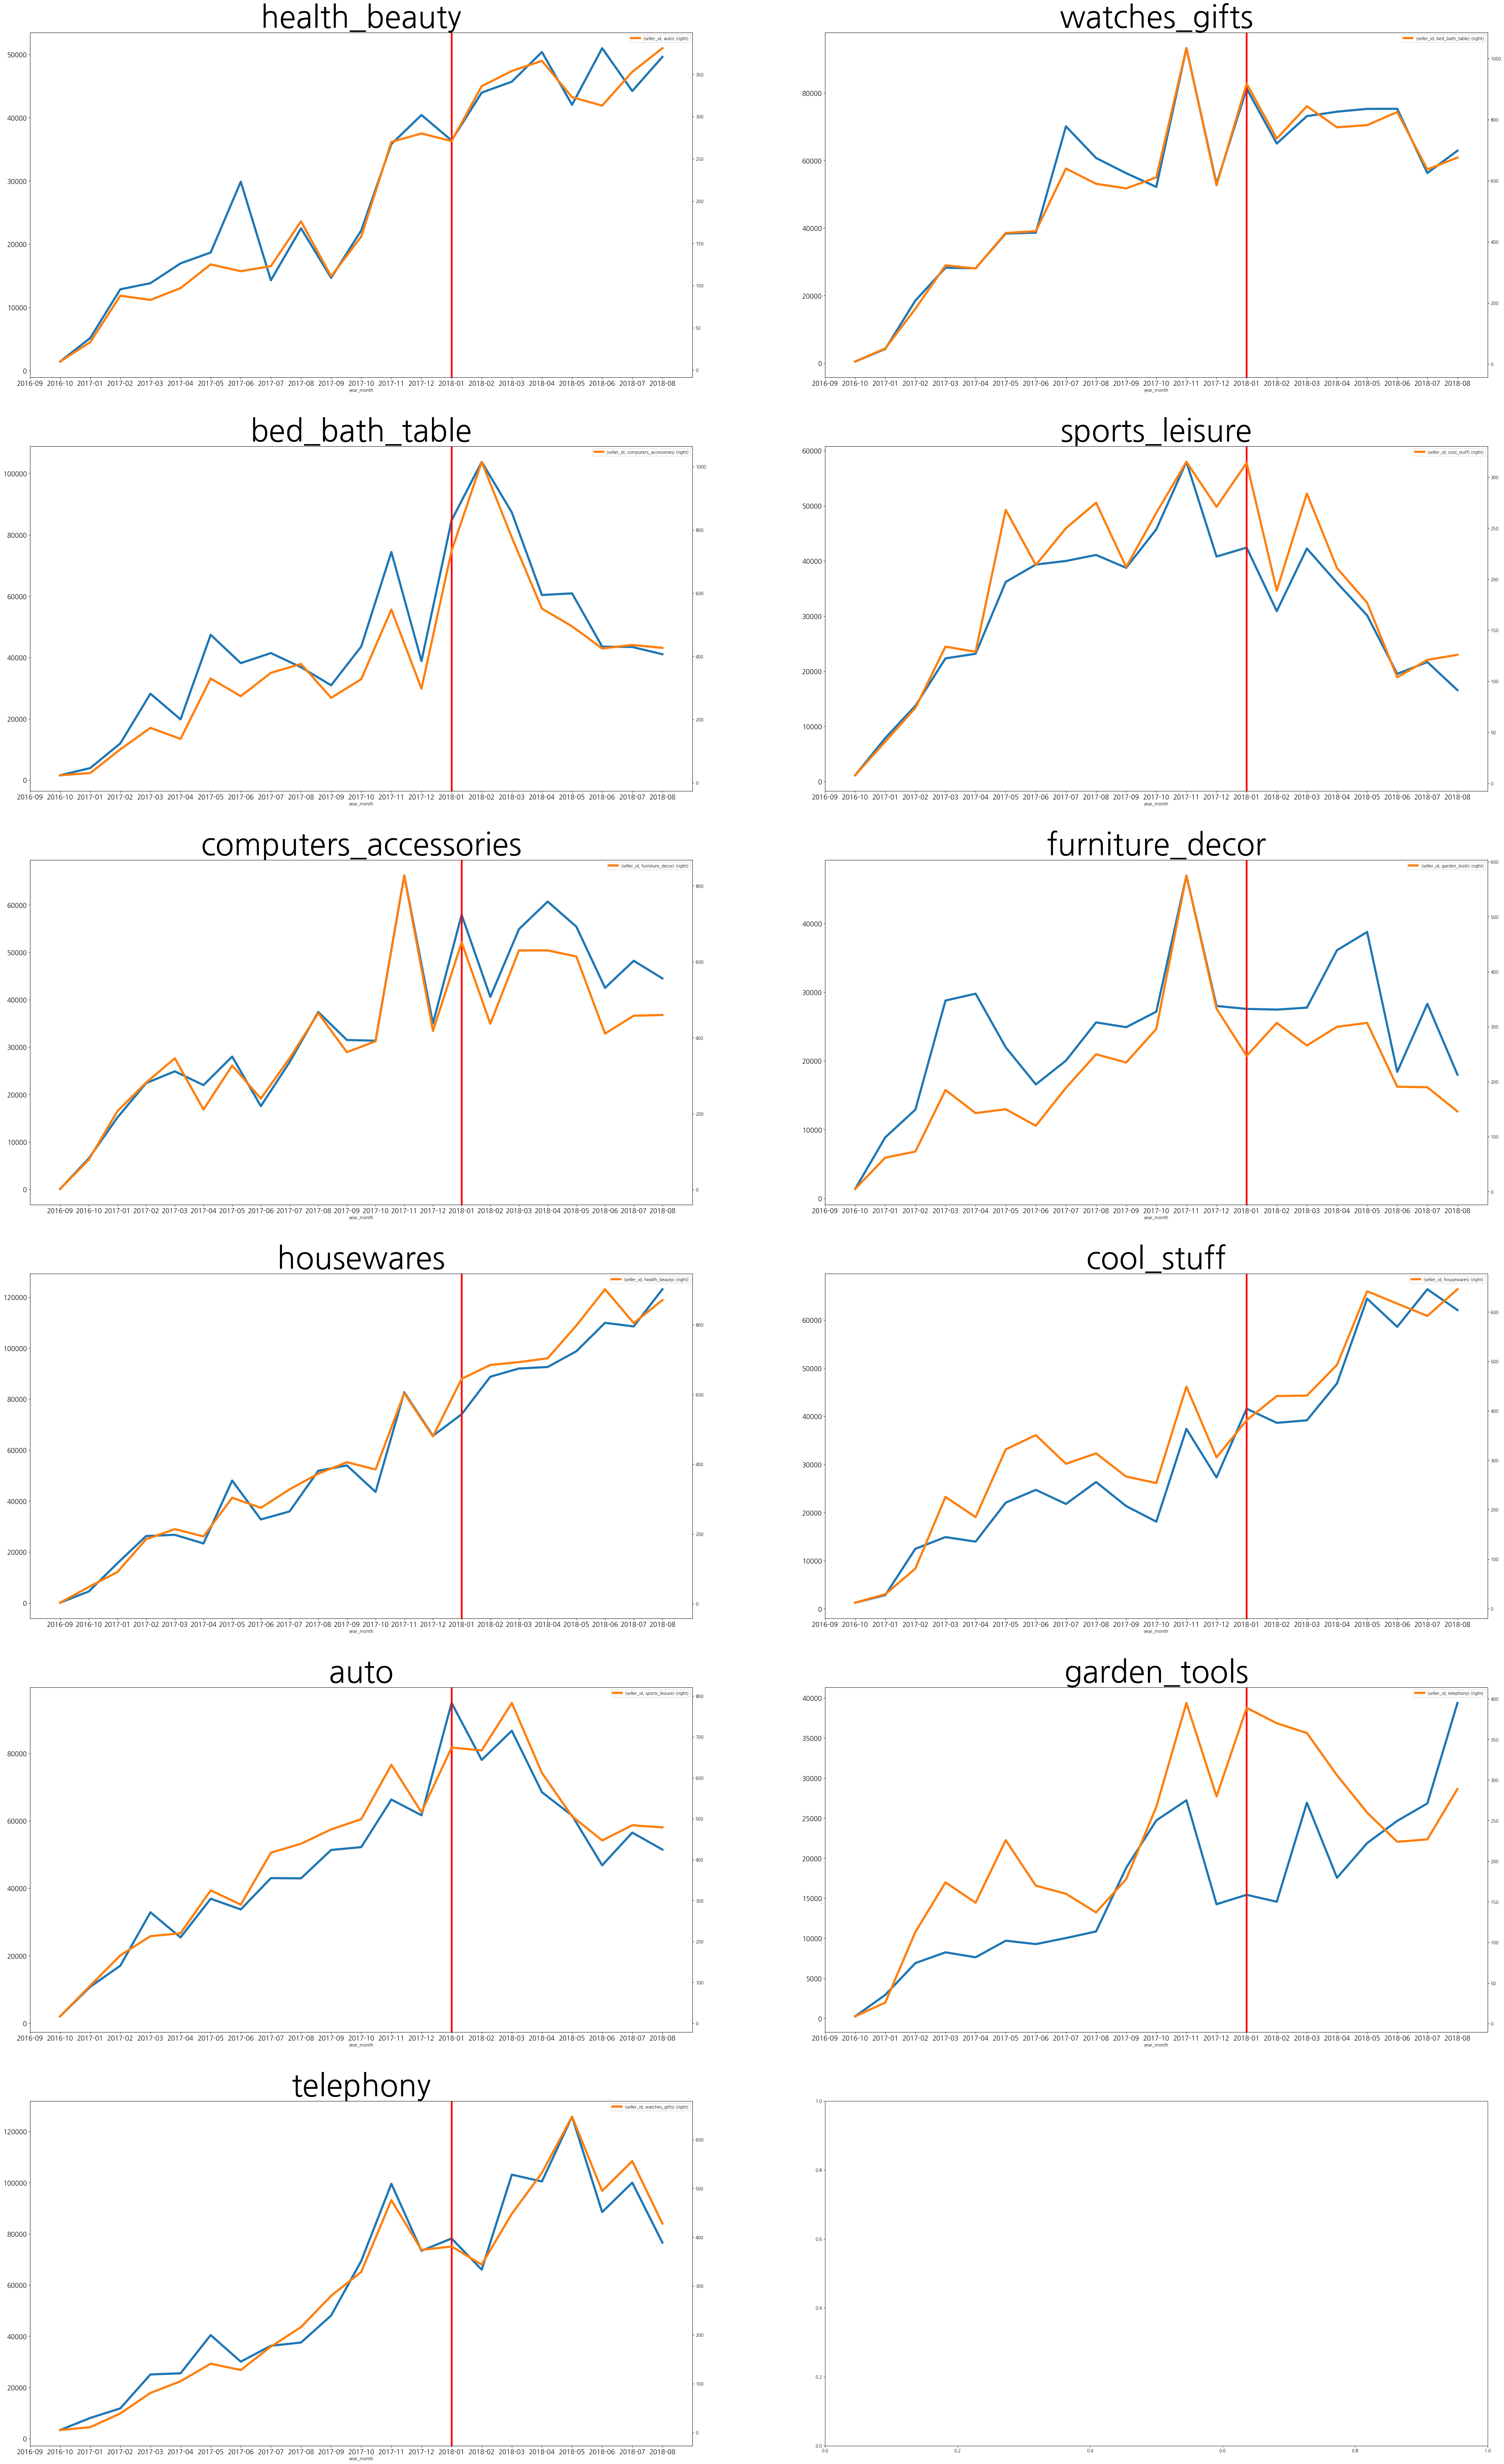

In [434]:
fig, ax = plt.subplots(6, 2, figsize=(60,100))
for i in range(11):
    ax[i//2][i%2].set_title(temp_l[i], fontsize=70)
    ax[i//2][i%2].tick_params(axis="both", labelsize=15)
    ax[i//2][i%2].plot(temp.unstack()[temp.unstack().columns[i]], linewidth=5)
    
    ax[i//2][i%2].axvline(x="2018-01", color='r', linewidth=4)

    ax2 = temp.unstack()[temp.unstack().columns[i + 11]].plot(secondary_y=True, linewidth=5, ax=ax[i//2][i%2])
    
    ax2.legend()

In [253]:
temp = df.groupby(["year_month", "product_category_name_english"]).agg({"price":"sum"})
temp

price
year_month product_category_name_english                    
2016-09    furniture_decor                             72.89
           health_beauty                              134.97
2016-10    air_conditioning                          1707.09
           audio                                      156.99
           auto                                      1443.25
...                                                      ...
2018-08    stationery                               16176.65
           telephony                                39389.82
           toys                                     16923.75
           watches_gifts                            76581.87
2018-09    kitchen_dining_laundry_garden_furniture    145.00

[1252 rows x 1 columns]

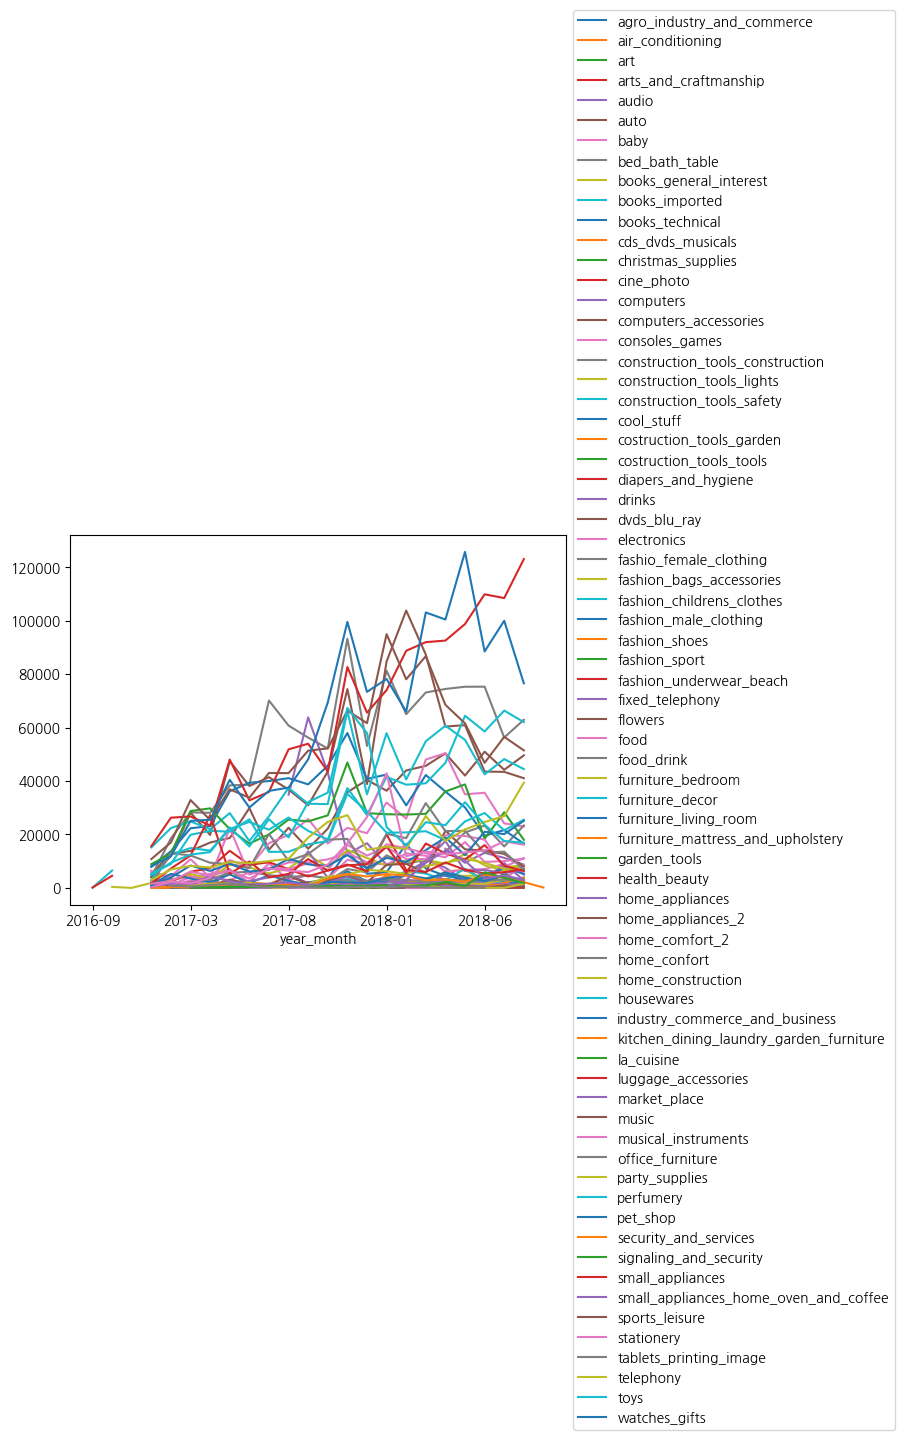

In [254]:
temp.unstack()["price"].plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [403]:
df["customer_id"].nunique()

96811

In [404]:
df["customer_id"].value_counts()

270c23a11d024a44c896d1894b261a83    63
13aa59158da63ba0e93ec6ac2c07aacb    38
9af2372a1e49340278e7c1ef8d749f34    29
92cd3ec6e2d643d4ebd0e3d6238f69e2    26
86cc80fef09f7f39df4b0dbce48e81cb    24
                                    ..
49db40a65d22c7454da2face2fea96af     1
83fdbc7a2c69f371538d61721ae5f507     1
d9a4e05b8c763933f3a6c9640d64a75d     1
6163b8118780f6c45ed62592c11dceab     1
4b7decb9b58e2569548b8b4c8e20e8d7     1
Name: customer_id, Length: 96811, dtype: int64

In [407]:
print(df.shape)

condition = df["customer_id"] == "270c23a11d024a44c896d1894b261a83"
df.loc[condition, :].groupby("product_category_name").agg({"seller_id":"count"})

(116023, 34)


,seller_id
product_category_name,
cama_mesa_banho,42
utilidades_domesticas,21


In [409]:
df.loc[condition, :].head(30)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_unique_id,customer_zip_code_prefix_x,customer_city,customer_state,product_category_name,customer_zip_code_prefix_y,seller_city,seller_state,product_category_name_english,year_month
100065,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,2.0,ebf9bc6cd600eadd681384e3116fda85,...,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,SP,cama_mesa_banho,25803.0,tres rios,RJ,bed_bath_table,2017-08
100064,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,2.0,ebf9bc6cd600eadd681384e3116fda85,...,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,SP,cama_mesa_banho,25803.0,tres rios,RJ,bed_bath_table,2017-08
100063,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,2.0,ebf9bc6cd600eadd681384e3116fda85,...,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,SP,cama_mesa_banho,25803.0,tres rios,RJ,bed_bath_table,2017-08
100061,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,2.0,ebf9bc6cd600eadd681384e3116fda85,...,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,SP,cama_mesa_banho,25803.0,tres rios,RJ,bed_bath_table,2017-08
100060,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,2.0,ebf9bc6cd600eadd681384e3116fda85,...,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,SP,cama_mesa_banho,25803.0,tres rios,RJ,bed_bath_table,2017-08
100059,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,2.0,ebf9bc6cd600eadd681384e3116fda85,...,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,SP,cama_mesa_banho,25803.0,tres rios,RJ,bed_bath_table,2017-08
100058,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,2.0,ebf9bc6cd600eadd681384e3116fda85,...,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,SP,cama_mesa_banho,25803.0,tres rios,RJ,bed_bath_table,2017-08
100057,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,2.0,ebf9bc6cd600eadd681384e3116fda85,...,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,SP,cama_mesa_banho,25803.0,tres rios,RJ,bed_bath_table,2017-08
100056,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,2.0,ebf9bc6cd600eadd681384e3116fda85,...,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,SP,cama_mesa_banho,25803.0,tres rios,RJ,bed_bath_table,2017-08
100055,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,2.0,ebf9bc6cd600eadd681384e3116fda85,...,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,SP,cama_mesa_banho,25803.0,tres rios,RJ,bed_bath_table,2017-08


# top10 seller

In [466]:
# 셀러는 약 3,100명
seller

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [467]:
order

NameError: name 'order' is not defined

In [474]:
df.groupby("seller_id").sum()["price"].sort_values(ascending=False)

/var/folders/ql/gbsdt1191mbf_hk8mhnwwpd80000gn/T/ipykernel_54773/2515724730.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("seller_id").sum()["price"].sort_values(ascending=False)


seller_id
53243585a1d6dc2643021fd1853d8905    244627.55
4869f7a5dfa277a7dca6462dcf3b52b2    237632.23
4a3ca9315b744ce9f8e9374361493884    215678.97
fa1c13f2614d7b5c4749cbc52fecda94    202784.32
7c67e1448b00f6e969d365cea6b010ab    199688.11
                                      ...    
4965a7002cca77301c82d3f91b82e1a9         8.49
ad14615bdd492b01b0d97922e87cb87f         8.25
1fa2d3def6adfa70e58c276bb64fe5bb         6.90
77128dec4bec4878c37ab7d6169d6f26         6.50
cf6f6bc4df3999b9c6440f124fb2f687         3.50
Name: price, Length: 2993, dtype: float64

In [477]:
top10_seller = df.groupby("seller_id").sum()["price"].sort_values(ascending=False).index[:10]
top10_seller

/var/folders/ql/gbsdt1191mbf_hk8mhnwwpd80000gn/T/ipykernel_54773/3597438339.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top10_seller = df.groupby("seller_id").sum()["price"].sort_values(ascending=False).index[:10]


Index(['53243585a1d6dc2643021fd1853d8905', '4869f7a5dfa277a7dca6462dcf3b52b2',
       '4a3ca9315b744ce9f8e9374361493884', 'fa1c13f2614d7b5c4749cbc52fecda94',
       '7c67e1448b00f6e969d365cea6b010ab', '7e93a43ef30c4f03f38b393420bc753a',
       'da8622b14eb17ae2831f4ac5b9dab84a', '7a67c85e85bb2ce8582c35f2203ad736',
       '1025f0e2d44d7041d6cf58b6550e0bfa', '955fee9216a65b617aa5c0531780ce60'],
      dtype='object', name='seller_id')

In [480]:
condition = df["seller_id"].map(lambda x : True if x in top10_seller else False)
df.loc[condition, :]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_unique_id,customer_zip_code_prefix_x,customer_city,customer_state,product_category_name,customer_zip_code_prefix_y,seller_city,seller_state,product_category_name_english,year_month
62069,bc0e0c28cbe995798d3afb7c7c75d269,a9dc96b027d1252bbac0a9b72d837fc6,delivered,2016-10-08 01:28:14,2016-10-08 03:19:09,2016-10-14 17:39:46,2016-10-17 18:39:46,2016-12-02 00:00:00,1.0,fd8a5b9a8a79d7ba0739d69be5dc5aa1,...,fdaa290acb9eeacb66fa7f979baa6803,23012,rio de janeiro,RJ,relogios_presentes,6429.0,barueri,SP,watches_gifts,2016-10
97106,d6f83d3377bbf1697831ea355301fb87,f3e73ca7cd85db9bb9be47fc88d38bc8,delivered,2017-01-23 18:56:45,2017-01-23 19:10:11,2017-01-25 15:35:11,2017-02-14 07:03:23,2017-03-02 00:00:00,1.0,777d2e438a1b645f3aec9bd57e92672c,...,e2c8e74f4e59280c388ac4e3ebd90933,28435,tres irmaos,RJ,cama_mesa_banho,14940.0,ibitinga,SP,bed_bath_table,2017-01
97108,d6f83d3377bbf1697831ea355301fb87,f3e73ca7cd85db9bb9be47fc88d38bc8,delivered,2017-01-23 18:56:45,2017-01-23 19:10:11,2017-01-25 15:35:11,2017-02-14 07:03:23,2017-03-02 00:00:00,2.0,777d2e438a1b645f3aec9bd57e92672c,...,e2c8e74f4e59280c388ac4e3ebd90933,28435,tres irmaos,RJ,cama_mesa_banho,14940.0,ibitinga,SP,bed_bath_table,2017-01
97107,d6f83d3377bbf1697831ea355301fb87,f3e73ca7cd85db9bb9be47fc88d38bc8,delivered,2017-01-23 18:56:45,2017-01-23 19:10:11,2017-01-25 15:35:11,2017-02-14 07:03:23,2017-03-02 00:00:00,1.0,777d2e438a1b645f3aec9bd57e92672c,...,e2c8e74f4e59280c388ac4e3ebd90933,28435,tres irmaos,RJ,cama_mesa_banho,14940.0,ibitinga,SP,bed_bath_table,2017-01
97851,6d234dea658ce0c00f91e931cb11f93c,ce80c46eb733623b83a7458b918ca30c,delivered,2017-01-15 15:52:04,2017-01-17 03:10:11,2017-01-17 15:10:16,2017-01-26 12:45:50,2017-02-24 00:00:00,1.0,00be617b58175bf207fd35910d5097a4,...,48aac093ce4d05afcd577ef894f27dfe,23970,paraty,RJ,cama_mesa_banho,14940.0,ibitinga,SP,bed_bath_table,2017-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64431,1a109ace7bc73c15e6ef45d6d4423dbd,7be6507bba601fe8224a25ec56e81844,delivered,2018-08-15 11:44:35,2018-08-15 11:55:20,2018-08-20 12:28:00,2018-08-29 13:10:54,2018-09-06 00:00:00,1.0,2669a9fe1aaf6cb29071f8f866014afc,...,978a800d90e640f035c08b4ee99dbaf9,21032,rio de janeiro,RJ,audio,14840.0,guariba,SP,audio,2018-08
64430,14666138d6ac727f90a5f2775b282d07,a1b848486ab5bf5941a00cb77f624e97,delivered,2018-08-16 00:42:39,2018-08-17 00:49:12,2018-08-17 12:24:00,2018-08-27 20:27:35,2018-09-14 00:00:00,1.0,2669a9fe1aaf6cb29071f8f866014afc,...,9c9db470bcda9cb57fed04c03452cd0e,41740,salvador,BA,audio,14840.0,guariba,SP,audio,2018-08
64429,891bbd4e052c5f3e894ed330a7419c6e,095179eaa54b75064120ccdbe350eef3,delivered,2018-08-13 17:13:41,2018-08-13 17:25:14,2018-08-15 07:00:00,2018-08-20 19:08:43,2018-08-27 00:00:00,1.0,2669a9fe1aaf6cb29071f8f866014afc,...,b5942bee6bddbc0becb625c49cc1c46b,4703,sao paulo,SP,audio,14840.0,guariba,SP,audio,2018-08
64428,6a6a5e595e782a6d0de7abee5fab0b89,8f0b26345ceb1dd629eaecad15b37e45,delivered,2018-08-24 10:11:57,2018-08-24 10:36:08,2018-08-24 12:26:00,2018-08-29 16:51:28,2018-09-18 00:00:00,1.0,2669a9fe1aaf6cb29071f8f866014afc,...,8676422a5c30ff97f055b28adadbb506,21041,rio de janeiro,RJ,audio,14840.0,guariba,SP,audio,2018-08


In [490]:
condition = df["seller_id"].map(lambda x : True if x == '4869f7a5dfa277a7dca6462dcf3b52b2' else False)
temp = df.loc[condition, :]
temp.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_unique_id,customer_zip_code_prefix_x,customer_city,customer_state,product_category_name,customer_zip_code_prefix_y,seller_city,seller_state,product_category_name_english,year_month
80489,29124c072d8e7d7681a0bebfe267c67a,bc44c4c170767755c0321dc6aa1aa05b,delivered,2017-03-18 12:00:57,2017-03-18 12:00:57,2017-03-23 16:09:07,2017-03-30 14:37:29,2017-04-10 00:00:00,1.0,86b4986bc313d65b0b5e46f5be8d11ce,...,5053321e149637b00e40aa4be14fd6a4,6715,cotia,SP,consoles_games,14840.0,guariba,SP,consoles_games,2017-03
80487,a245546c993a6f40b013cf1935965656,6957b3f555a2d12a5695c6108789df75,delivered,2017-03-16 19:42:36,2017-03-16 19:42:36,2017-03-17 10:41:47,2017-03-31 12:39:44,2017-04-10 00:00:00,1.0,dd3575a8c5e2139f680a9816a15c8f2a,...,386503f8c11b7c0fa148a77a039e6920,22261,rio de janeiro,RJ,consoles_games,14840.0,guariba,SP,consoles_games,2017-03
80486,02951078a21a2d9341ea16089a4d5031,6c51ed8c29ff8bc5f3b649dc7315b787,delivered,2017-03-16 15:16:53,2017-03-23 16:10:18,2017-03-24 14:42:45,2017-04-05 17:04:39,2017-04-19 00:00:00,1.0,dd3575a8c5e2139f680a9816a15c8f2a,...,6d841360f19534b806b7ff157b2a54de,49980,neopolis,SE,consoles_games,14840.0,guariba,SP,consoles_games,2017-03
80485,9740d42a9b2382330f2b00d90f34def0,4095e905c0684c956424a8b941a2868c,delivered,2017-03-14 10:20:54,2017-03-14 10:20:54,2017-03-17 10:41:52,2017-03-21 11:12:10,2017-04-04 00:00:00,1.0,dd3575a8c5e2139f680a9816a15c8f2a,...,d68ff6fee273df548be04727052e2d16,5030,sao paulo,SP,consoles_games,14840.0,guariba,SP,consoles_games,2017-03
80484,1c8757886a51b1d2a57ef26e7004ee37,386e4ddbf54f557c9d251e49d32ca7c2,delivered,2017-03-15 19:26:44,2017-03-15 19:26:44,2017-03-17 10:41:46,2017-03-28 18:24:57,2017-04-07 00:00:00,1.0,dd3575a8c5e2139f680a9816a15c8f2a,...,272c0b6034c4d5b0b42252d40a9b53b4,35052,governador valadares,MG,consoles_games,14840.0,guariba,SP,consoles_games,2017-03
59168,522cbbbed021f59b773323ed5039ceee,895bbb0f6027aa8b3a841fdb10711dce,delivered,2017-05-31 01:17:48,2017-05-31 01:30:17,2017-05-31 15:38:15,2017-06-14 18:24:55,2017-06-27 00:00:00,1.0,d46fd2913d3e97327005905cb5eda90b,...,c9027dd7aa244d174bd29a92e9e181cf,38702,patos de minas,MG,relogios_presentes,14840.0,guariba,SP,watches_gifts,2017-05
80488,ba7da71e493836130bdb223e6e2fd4d4,ce3eb6d026457e39761863f83fcda774,delivered,2017-05-20 17:45:52,2017-05-20 17:55:12,2017-05-25 15:56:29,2017-06-11 07:47:43,2017-06-13 00:00:00,1.0,dd3575a8c5e2139f680a9816a15c8f2a,...,583405f8d756ec37a13a4f5b19f1e2ee,9321,maua,SP,consoles_games,14840.0,guariba,SP,consoles_games,2017-05
58536,d0ecd96d0c6926c81ff571a7c21bfdca,264b02b4faf59b7ad0b4bd065056a804,delivered,2017-06-20 13:51:17,2017-06-20 14:03:57,2017-06-27 09:08:21,2017-07-10 17:15:33,2017-07-18 00:00:00,1.0,0a57f7d2c983bcf8188589a5fea4a8da,...,5348281df50de35c5eb3816f99e69ed9,70673,brasilia,DF,relogios_presentes,14840.0,guariba,SP,watches_gifts,2017-06
58587,bd06bffcca4ccf9aa809745a4d503085,74617dbb7f2de4ac9e4119a90ba82afc,delivered,2017-06-22 20:43:45,2017-06-23 15:04:54,2017-06-27 08:07:29,2017-07-01 11:16:48,2017-07-18 00:00:00,1.0,0a57f7d2c983bcf8188589a5fea4a8da,...,9539080163fbcb3ef263b17f4eb6b861,82200,curitiba,PR,relogios_presentes,14840.0,guariba,SP,watches_gifts,2017-06
58614,26ac2176dfb7275b81ddf0873db31236,a67d859e19f536517a73416adb2739e4,delivered,2017-06-14 13:52:50,2017-06-14 14:05:18,2017-06-19 16:10:58,2017-06-23 13:06:42,2017-07-05 00:00:00,1.0,41c24b8ce92d1a2cac62db5edfd088b2,...,e19223aa463d1a3049667aa9c086ad5c,7438,aruja,SP,relogios_presentes,14840.0,guariba,SP,watches_gifts,2017-06


In [491]:
temp["product_category_name_english"].unique()

array(['consoles_games', 'watches_gifts', 'health_beauty',
       'computers_accessories', 'audio', 'cool_stuff', 'telephony',
       'electronics', 'auto', 'sports_leisure'], dtype=object)

In [492]:
condition = temp["product_category_name_english"] == "computers"
res = temp.loc[condition, "year_month"].iloc[0]
res

IndexError: single positional indexer is out-of-bounds